In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
import matplotlib  as plt2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv("../datasets/heart_2022.csv")
dummy=pd.read_csv("../datasets/heart_2022.csv")

In [3]:
data.shape

(445132, 40)

In [5]:
data.dropna(inplace=True)
data.shape

(246022, 40)

In [7]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [4]:
dummy.shape

(445132, 40)

In [6]:
dummy.dropna(inplace=True)
dummy.shape

(246022, 40)

In [8]:
data.drop(columns=['State', 'RemovedTeeth', 'PneumoVaxEver', 'TetanusLast10Tdap', 'LastCheckupTime', 
                   'PhysicalHealthDays', 'MentalHealthDays', 'RaceEthnicityCategory', 'FluVaxLast12', 
                   'CovidPos', 'ECigaretteUsage', 'AgeCategory'], inplace=True)

In [9]:
data.columns

Index(['Sex', 'GeneralHealth', 'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ChestScan', 'HeightInMeters', 'WeightInKilograms',
       'BMI', 'AlcoholDrinkers', 'HIVTesting', 'HighRiskLastYear'],
      dtype='object')

In [10]:
data.head()

,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ChestScan,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,HighRiskLastYear
342,Female,Very good,Yes,9.0,No,No,No,No,No,No,...,No,No,Former smoker,No,1.60,71.67,27.99,No,No,No
343,Male,Very good,Yes,6.0,No,No,No,No,No,No,...,No,No,Former smoker,No,1.78,95.25,30.13,No,No,No
345,Male,Very good,No,8.0,No,No,No,No,No,No,...,No,No,Former smoker,Yes,1.85,108.86,31.66,Yes,No,No
346,Female,Fair,Yes,9.0,No,No,No,No,Yes,No,...,No,No,Never smoked,No,1.70,90.72,31.32,No,No,No
347,Female,Good,Yes,5.0,No,No,No,No,No,No,...,No,No,Never smoked,No,1.55,79.38,33.07,No,No,No


In [11]:
data.shape

(246022, 28)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246022 entries, 342 to 445130
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        246022 non-null  object 
 1   GeneralHealth              246022 non-null  object 
 2   PhysicalActivities         246022 non-null  object 
 3   SleepHours                 246022 non-null  float64
 4   HadHeartAttack             246022 non-null  object 
 5   HadAngina                  246022 non-null  object 
 6   HadStroke                  246022 non-null  object 
 7   HadAsthma                  246022 non-null  object 
 8   HadSkinCancer              246022 non-null  object 
 9   HadCOPD                    246022 non-null  object 
 10  HadDepressiveDisorder      246022 non-null  object 
 11  HadKidneyDisease           246022 non-null  object 
 12  HadArthritis               246022 non-null  object 
 13  HadDiabetes                24602

In [13]:
data.describe()

,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000
mean,7.021331,1.705150,83.615179,28.668136
std,1.440681,0.106654,21.323156,6.513973
min,1.000000,0.910000,28.120000,12.020000
25%,6.000000,1.630000,68.040000,24.270000
50%,7.000000,1.700000,81.650000,27.460000
75%,8.000000,1.780000,95.250000,31.890000
max,24.000000,2.410000,292.570000,97.650000


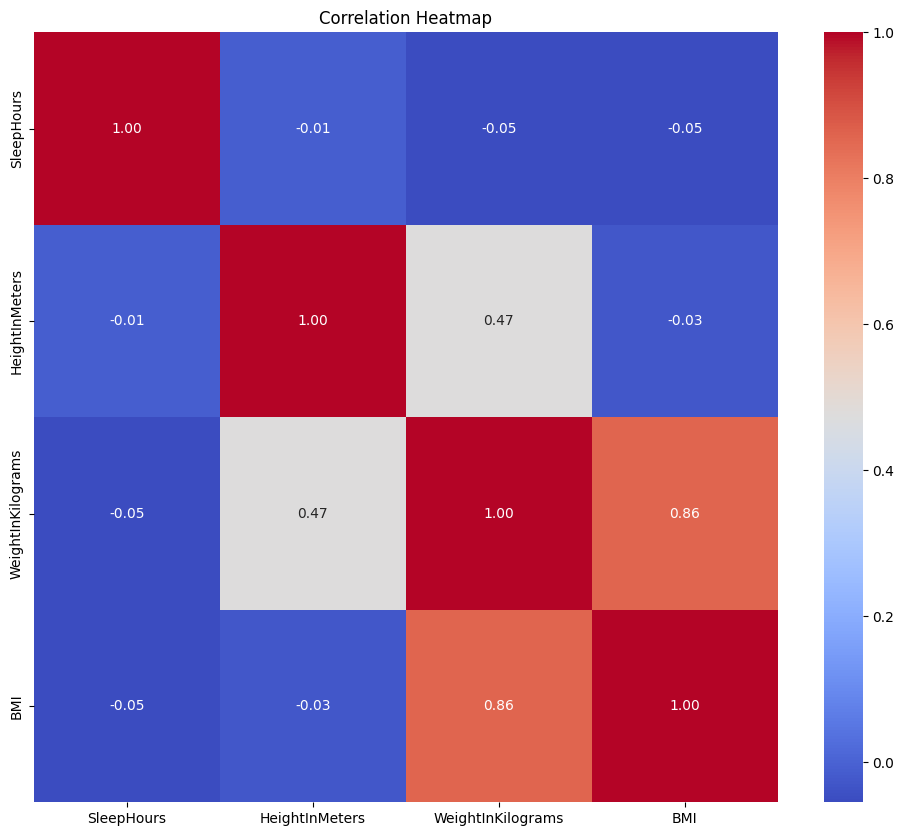

In [14]:
numeric_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
le = LabelEncoder()
categorical_columns=data.select_dtypes(include='object').columns
for col in categorical_columns:
    data[col]=le.fit_transform(data[col])

In [16]:
dummy['SmokerStatus'].head(10)

342    Former smoker
343    Former smoker
345    Former smoker
346     Never smoked
347     Never smoked
349     Never smoked
350     Never smoked
352     Never smoked
354    Former smoker
357    Former smoker
Name: SmokerStatus, dtype: object

In [17]:
data['SmokerStatus'].head(10)

342    2
343    2
345    2
346    3
347    3
349    3
350    3
352    3
354    2
357    2
Name: SmokerStatus, dtype: int64

In [18]:
data['GeneralHealth'].tail(10)

445107    1
445112    0
445113    2
445114    4
445115    2
445117    4
445123    1
445124    2
445128    0
445130    4
Name: GeneralHealth, dtype: int64

In [19]:
dummy['GeneralHealth'].tail(10)

445107         Fair
445112    Excellent
445113         Good
445114    Very good
445115         Good
445117    Very good
445123         Fair
445124         Good
445128    Excellent
445130    Very good
Name: GeneralHealth, dtype: object

In [20]:
dummy['PhysicalActivities'].head(5)

342    Yes
343    Yes
345     No
346    Yes
347    Yes
Name: PhysicalActivities, dtype: object

In [21]:
data.head(10)

,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ChestScan,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,HighRiskLastYear
342,0,4,1,9.0,0,0,0,0,0,0,...,0,0,2,0,1.60,71.67,27.99,0,0,0
343,1,4,1,6.0,0,0,0,0,0,0,...,0,0,2,0,1.78,95.25,30.13,0,0,0
345,1,4,0,8.0,0,0,0,0,0,0,...,0,0,2,1,1.85,108.86,31.66,1,0,0
346,0,1,1,9.0,0,0,0,0,1,0,...,0,0,3,0,1.70,90.72,31.32,0,0,0
347,0,2,1,5.0,0,0,0,0,0,0,...,0,0,3,0,1.55,79.38,33.07,0,0,0
349,1,2,1,7.0,0,0,0,0,0,0,...,0,0,3,1,1.85,120.20,34.96,1,1,0
350,0,2,1,8.0,0,0,1,0,0,0,...,0,0,3,1,1.63,88.00,33.30,0,0,0
352,1,1,1,8.0,1,1,0,0,1,0,...,0,0,3,1,1.75,74.84,24.37,0,1,0
354,1,2,0,6.0,0,0,0,0,0,0,...,0,0,2,1,1.70,78.02,26.94,0,0,0
357,0,4,1,7.0,0,0,0,1,1,0,...,0,0,2,1,1.68,63.50,22.60,0,0,0


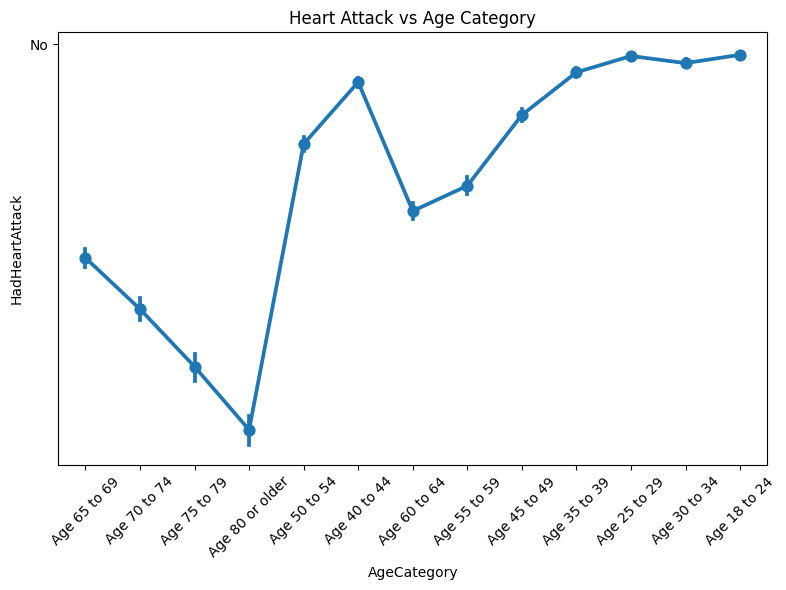

In [41]:
plt.figure(figsize=(8,6))
sns.pointplot(x="AgeCategory", y="HadHeartAttack", data=dummy)

plt.title("Heart Attack vs Age Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### RANDOM FOREST

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = data.drop(['HadHeartAttack'],axis = 1)
y = data['HadHeartAttack']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
X_train_prediction=RFC.predict(x_train)
train_prediction_accuracy=accuracy_score(X_train_prediction,y_train)*100
print('Accuracy on Training data : ', train_prediction_accuracy)

Accuracy on Training data :  99.90883488662428


In [27]:
X_test_prediction=RFC.predict(x_test)
test_prediction_accuracy=accuracy_score(X_test_prediction,y_test)*100
print('Accuracy on Testing data : ', test_prediction_accuracy)

Accuracy on Testing data :  94.81214518948067


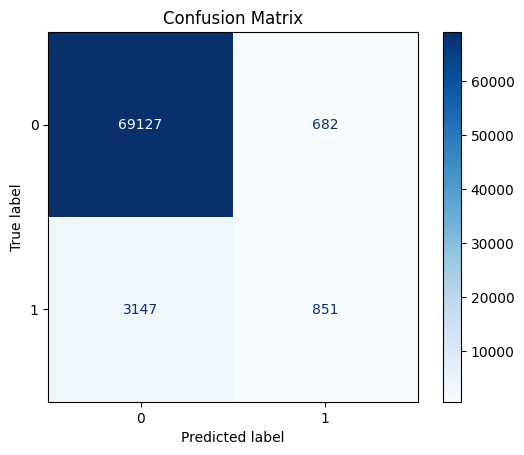

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     69809
           1       0.56      0.21      0.31      3998

    accuracy                           0.95     73807
   macro avg       0.76      0.60      0.64     73807
weighted avg       0.93      0.95      0.94     73807



In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = RFC.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RFC.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

### DECISION TREE

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
x_train_prediction=dtc.predict(x_train)
dtc_train_prediction_accuracy=accuracy_score(x_train_prediction,y_train)*100
print('Accuracy on Training data : ', dtc_train_prediction_accuracy)

Accuracy on Training data :  99.91464158174375


In [31]:
x_test_prediction=dtc.predict(x_test)
dtc_test_prediction_accuracy=accuracy_score(x_test_prediction,y_test)*100
print('Accuracy on Testing data : ', dtc_test_prediction_accuracy)

Accuracy on Testing data :  91.59835787933393


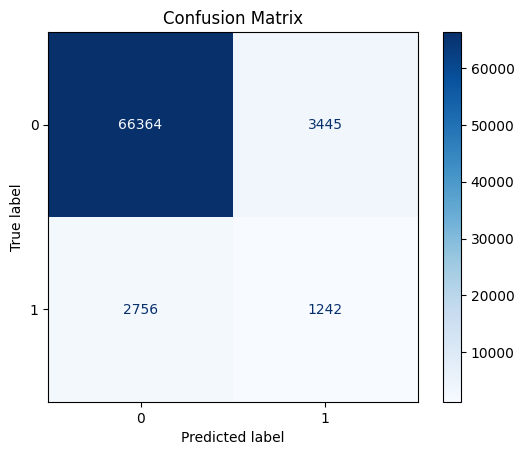

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     69809
           1       0.26      0.31      0.29      3998

    accuracy                           0.92     73807
   macro avg       0.61      0.63      0.62     73807
weighted avg       0.92      0.92      0.92     73807



In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = dtc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

### ACCURACY

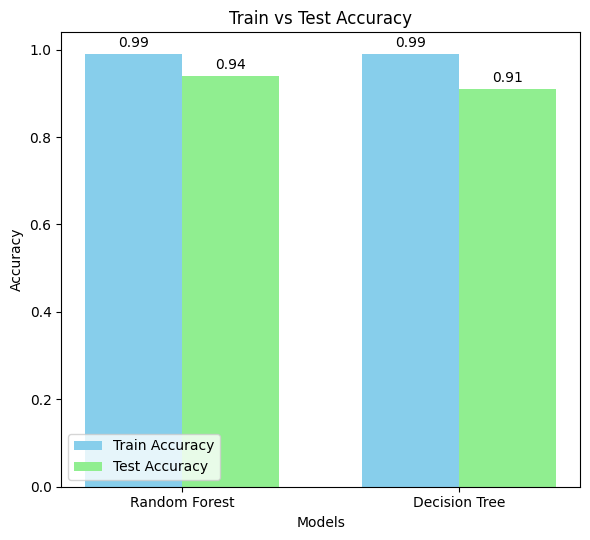

In [38]:
import numpy as np
train_accuracy = [0.99, 0.99]  # [Decision Tree, Random Forest]
test_accuracy = [0.94, 0.91]   # [Decision Tree, Random Forest]

models = ['Random Forest', 'Decision Tree']
X = np.arange(len(models))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(6,5.5))

# Bars for Train and Test
rects1 = ax.bar(X - width/2, train_accuracy, width, label='Train Accuracy', color='skyblue')
rects2 = ax.bar(X + width/2, test_accuracy, width, label='Test Accuracy', color='lightgreen')

# Labels and Title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Train vs Test Accuracy')
ax.set_xticks(X)
ax.set_xticklabels(models)
ax.legend()

# Add accuracy labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()

### EXPORTING MODEL

In [34]:
import pickle

In [35]:
heart_model = '../models/heart_disease_model.sav'
pickle.dump(RFC, open(heart_model, 'wb'))

C:\Users\Akash_PC\AppData\Local\Temp\ipykernel_35468\2517888381.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="magma")


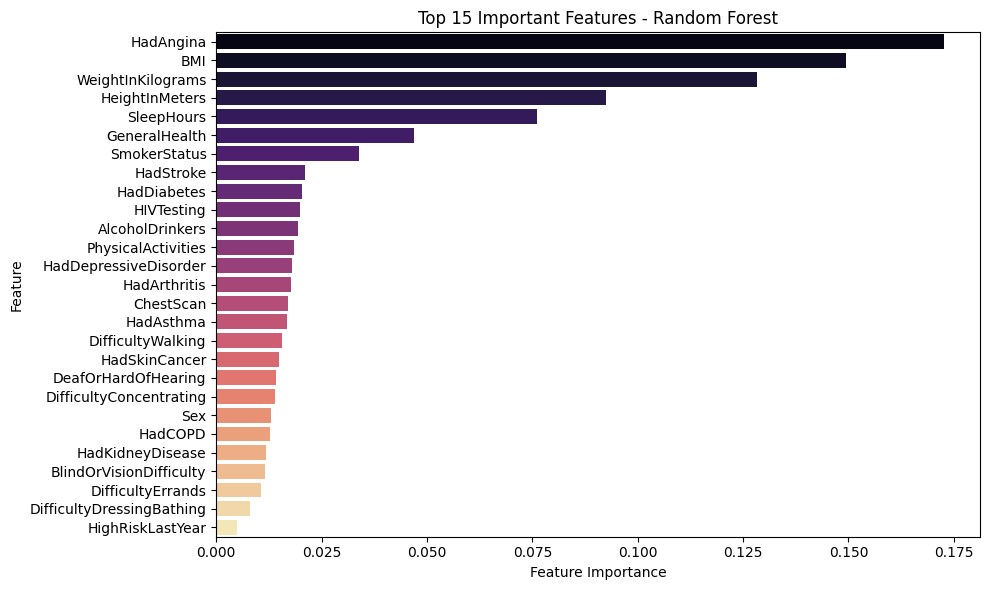

In [36]:
import seaborn as sns

feature_importance = pd.Series(RFC.feature_importances_, index=x.columns)
top_features = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="magma")
plt.title("Top 15 Important Features - Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [37]:
data.to_csv('..\datasets\Heart(Cleaned).csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Akash_PC\AppData\Local\Temp\ipykernel_35468\934831788.py:1: SyntaxWarning: invalid escape sequence '\d'
  data.to_csv('..\datasets\Heart(Cleaned).csv')
C:\Users\Akash_PC\AppData\Local\Temp\ipykernel_35468\934831788.py:1: SyntaxWarning: invalid escape sequence '\d'
  data.to_csv('..\datasets\Heart(Cleaned).csv')


PermissionError: [Errno 13] Permission denied: '..\\datasets\\Heart(Cleaned).csv'